# **Task**

1.  Data cleansing and missing value treatment

2.  Exploratory data analysis and visual plotting

3.  The scope of feature engineering

4.  Model building and evaluation, please choose a different set of models to show different prediction accuracy that you get from the data

**Question: Bank Marketing Analysis**

Data relates to a marketing campaign run by a bank.\
The aim of the marketing campaign was to get customers to subscribe to a bank term deposit product.\
Whether they did this or not is variable ‘y’ in the data set.

The bank in question is considering how to optimise this campaign in future.

What would your recommendations to the marketing manager be?

**Variable description**

The variables are as follows:\
**Input variables:**\
1 - age (numeric)\
2 - job : type of job (categorical: 'admin.','unknown','unemployed' 'management','housemaid','entrepreneur','student', 'blue-collar' 'self-employed','retired','technician','services')\
3 - marital : marital status (categorical: 'married','divorced','single'; note: 'divorced' means divorced or widowed)\
4 - education (categorical: 'unknown','secondary','primary','tertiary')\
5 - default: has credit in default? (binary: 'yes','no')\
6 - balance: average yearly balance, in euros (numeric)\
7 - housing: has housing loan? (binary: 'yes','no')\
8 - loan: has personal loan? (binary: 'yes','no')

**Related with the last contact of the current campaign:**\
9 - contact: contact communication type (categorical: 'unknown','telephone' 'cellular')\
10 - day: last contact day of the month (numeric)\
11 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')\
12 - duration: last contact duration, in seconds (numeric)

**Other attributes:**\
13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)\
14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)\
15 - previous: number of contacts performed before this campaign and for this client (numeric)\
16 - poutcome: outcome of the previous marketing campaign (categorical:
'unknown','other','failure','success')

**Output variable (desired target):**\
17 - y - has the client subscribed a term deposit? (binary: 'yes','no')

# **Solution**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd gdrive/MyDrive/MetInvest

Mounted at /content/gdrive
/content/gdrive/MyDrive/MetInvest


In [ ]:
from time import time
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, PowerTransformer, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv("data.txt", sep='\t')

In [ ]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
data.shape

(45211, 17)

## **1. Data cleansing and missing value treatment**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
print(data.isnull().sum() / data.shape[0])

age          0.0
job          0.0
marital      0.0
education    0.0
default      0.0
balance      0.0
housing      0.0
loan         0.0
contact      0.0
day          0.0
month        0.0
duration     0.0
campaign     0.0
pdays        0.0
previous     0.0
poutcome     0.0
y            0.0
dtype: float64


**So, data doesn`t contain nan values.**

In [ ]:
data.duplicated().sum()

0

**So, data doesn`t contain duplicates.**

In [ ]:
for column in list(data.columns):
    print(column, ":")
    print(sorted(data[column].unique()), "\n")

age :
[18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 92, 93, 94, 95] 

job :
['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown'] 

marital :
['divorced', 'married', 'single'] 

education :
['primary', 'secondary', 'tertiary', 'unknown'] 

default :
['no', 'yes'] 

balance :
[-8019, -6847, -4057, -3372, -3313, -3058, -2827, -2712, -2604, -2282, -2122, -2093, -2082, -2049, -1980, -1968, -1965, -1944, -1941, -1884, -1882, -1854, -1818, -1781, -1779, -1746, -1737, -1730, -1725, -1701, -1680, -1668, -1664, -1661, -1655, -1636, -1629, -1621, -1613, -1601, -1598, -1586, -1547, -1545, -1531, -1500, -1493, -1490, -1489, -1485, -1480, -1459, -1455, 

**As there are columns ('object' type) with 'no'/'yes' values, we will map these values into 0/1.**

In [ ]:
data.replace({"no": 0, "yes": 1}, inplace=True)

**We can also map `month` features to `int64` type.**

In [ ]:
map_months = dict(zip(["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"],
                  np.arange(1, 13)))
data.replace(map_months, inplace=True)
data["month"] = data["month"].astype("object")

## **2. Exploratory data analysis**

In [ ]:
data.describe()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,0.018027,1362.272058,0.555838,0.160226,15.806419,258.163080,2.763841,40.197828,0.580323,0.116985
std,10.618762,0.133049,3044.765829,0.496878,0.366820,8.322476,257.527812,3.098021,100.128746,2.303441,0.321406
min,18.000000,0.000000,-8019.000000,0.000000,0.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,0.000000,72.000000,0.000000,0.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,0.000000,448.000000,1.000000,0.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,0.000000,1428.000000,1.000000,0.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,1.000000,102127.000000,1.000000,1.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


**We see extremely large values in `balance, duration, campaign, pdays, previous` columns.\
We expect distribution of these variables have tail (skewness).\
Therefore we should use some transformations.**

In [ ]:
data.describe(include='object')

,job,marital,education,contact,month,poutcome
count,45211,45211,45211,45211,45211,45211
unique,12,3,4,3,12,4
top,blue-collar,married,secondary,cellular,5,unknown
freq,9732,27214,23202,29285,13766,36959


**Numeric features: 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'\
Binary features: 'default', 'housing', 'loan'\
Categorical features: 'job', 'marital', 'education', 'contact', 'month', 'poutcome'**

**Lets plot histplots, boxplots for numeric features and barplots for categorical features.**

In [ ]:
numeric_columns = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
categorical_columns = list(data.select_dtypes(include='object').columns)

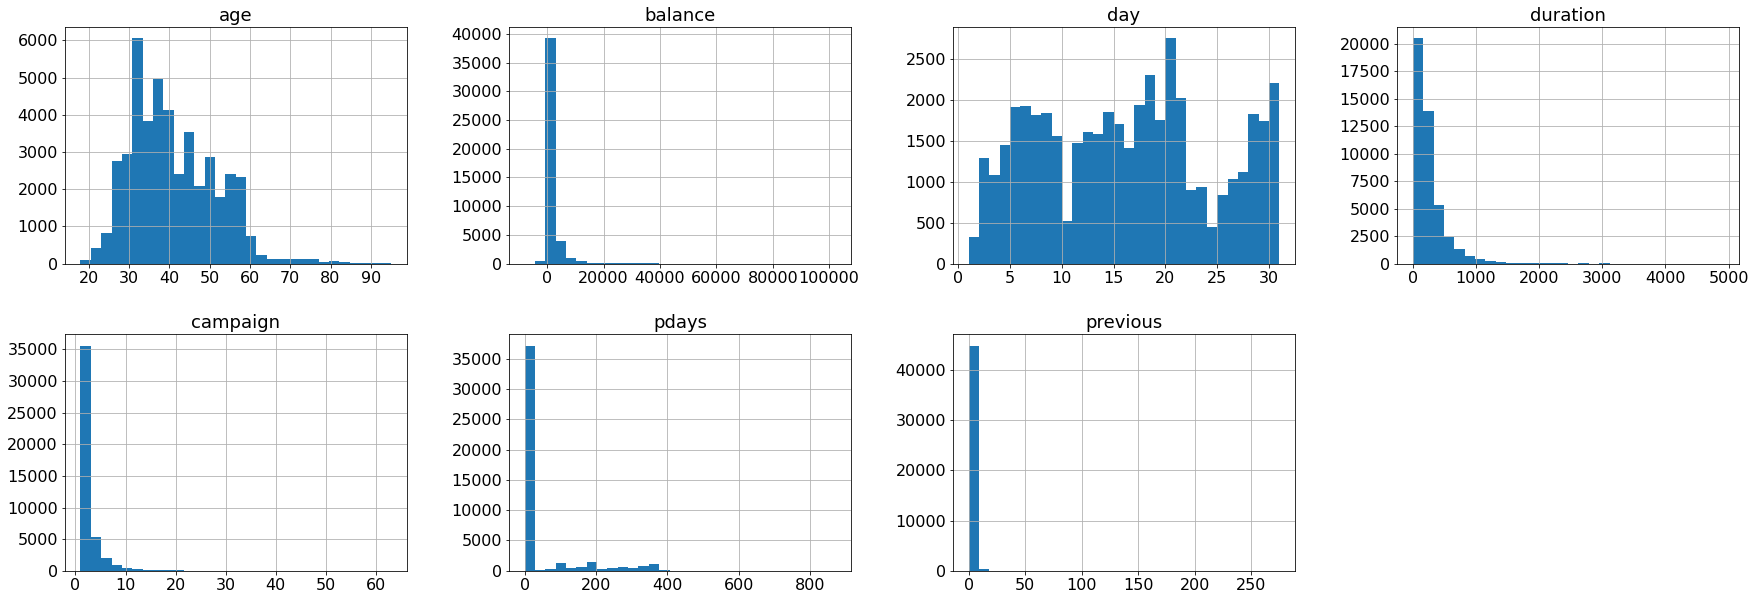

In [ ]:
fig = data[numeric_columns].hist(layout=(2, 4), figsize=(30, 10), bins=30, xlabelsize=16, ylabelsize=16)
[x.title.set_size(18) for x in fig.ravel()];

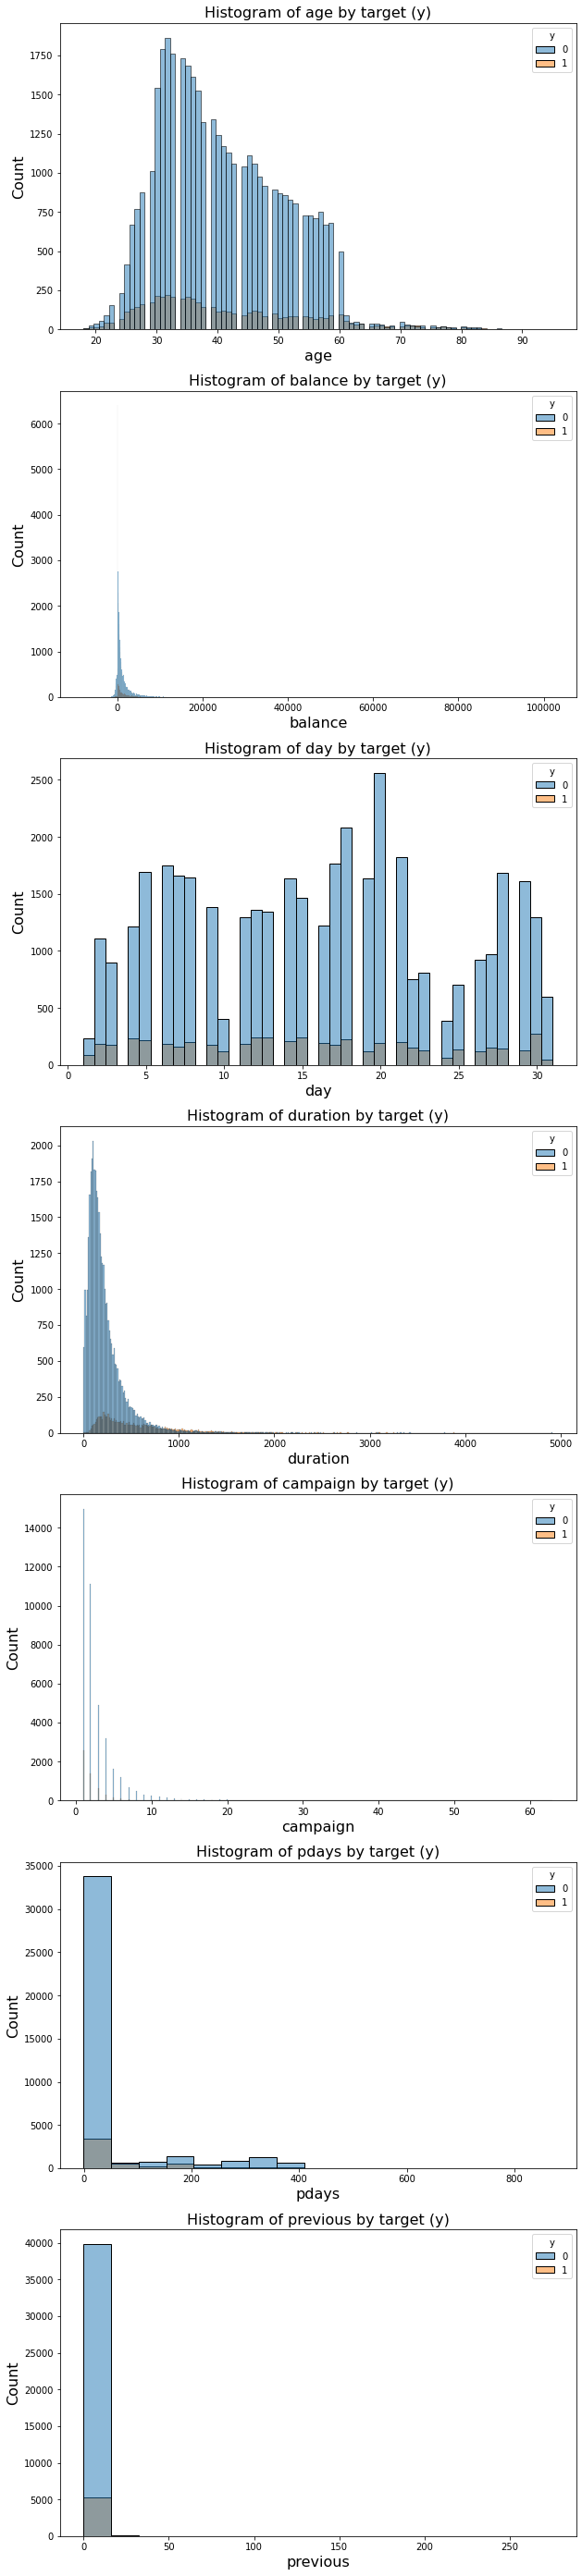

In [ ]:
fig, ax = plt.subplots(len(numeric_columns), 1, figsize=(10, 50))
for i, col_val in enumerate(numeric_columns):
    sns.histplot(data=data, x=col_val, hue='y', ax=ax[i])
    ax[i].set_title('Histogram of '+col_val+' by target (y)', fontsize=16)
    ax[i].set_xlabel(col_val, fontsize=16)
    ax[i].set_ylabel('Count', fontsize=16)
plt.show();

In [ ]:
data["old"] = np.where(data.age>60, 1, 0)
print(data.groupby(by=["old"])["y"].mean())
data.drop(columns=["old"], inplace=True)

old
0    0.108739
1    0.422559
Name: y, dtype: float64


**Customers over 60 are much more likely to subscribe to a bank term deposit product.**

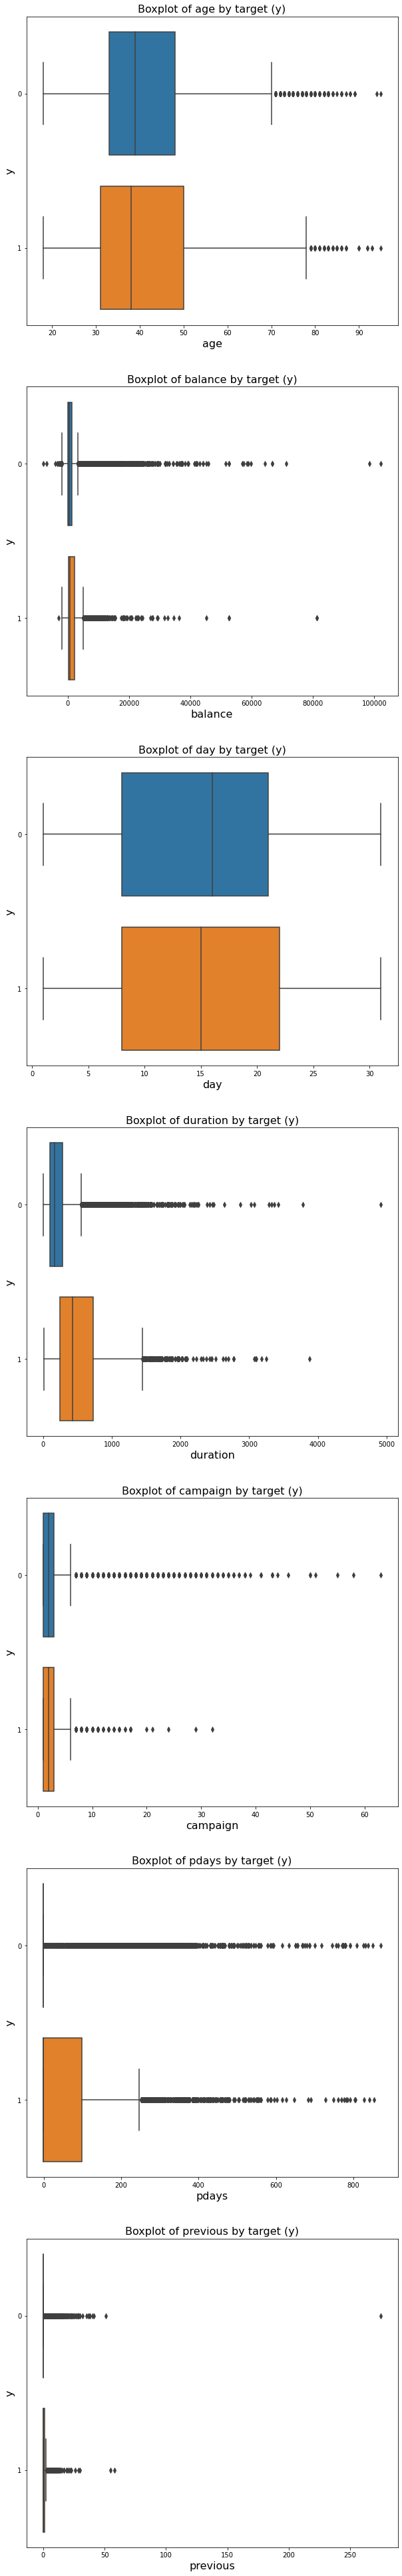

In [ ]:
fig, ax = plt.subplots(len(numeric_columns), 1, figsize=(10, 70))
for i, col_val in enumerate(numeric_columns):
    sns.boxplot(data=data, x=col_val, y='y', orient='h', ax=ax[i])
    ax[i].set_title('Boxplot of '+col_val+' by target (y)', fontsize=16)
    ax[i].set_xlabel(col_val, fontsize=16)
    ax[i].set_ylabel('y', fontsize=16)
plt.show();

**`Deposit subscribers` have significantly higher duration parameter.\
The most of `NO deposit subsribers` were not contacted in a previous campaign.**

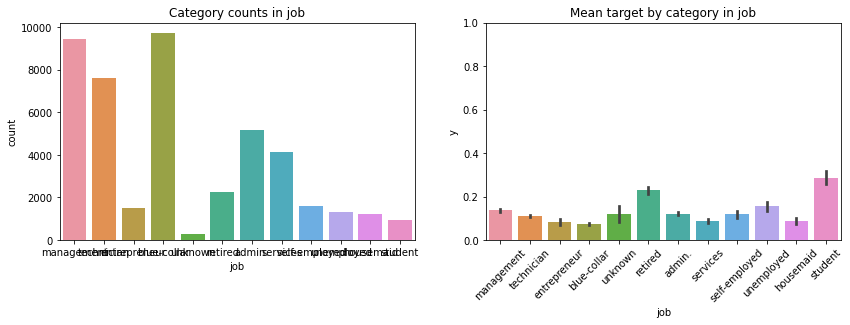

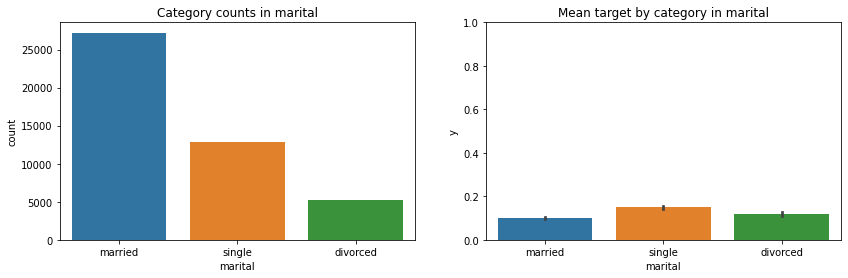

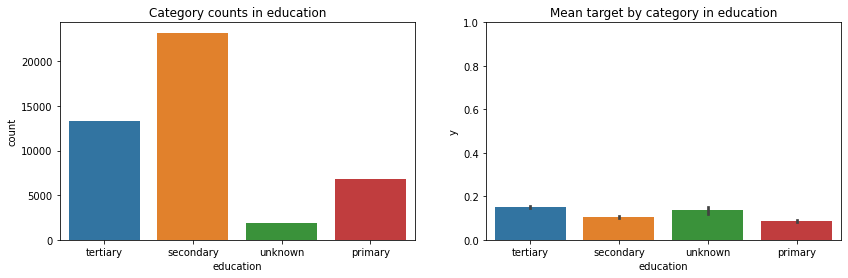

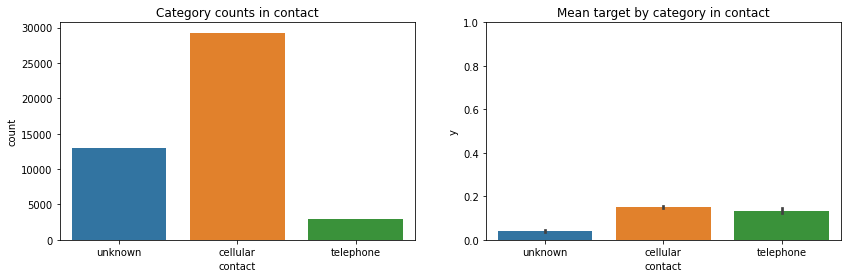

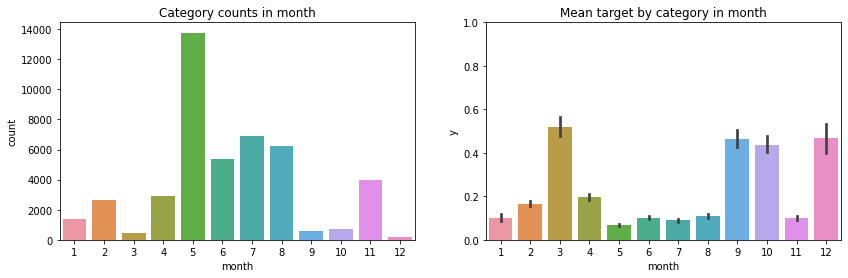

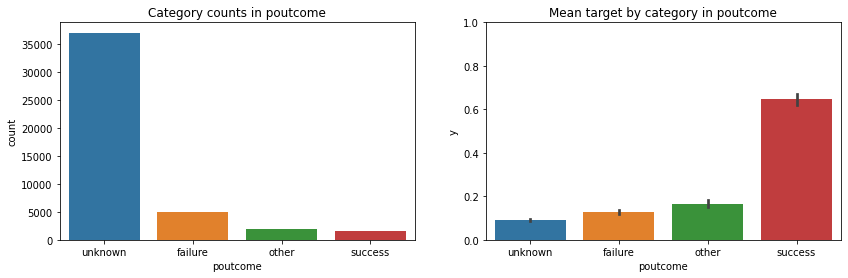

In [ ]:
for col_val in categorical_columns:
    fig, ax = plt.subplots(1, 2, figsize=(14, 4))
    if col_val =='job':
        plt.xticks(rotation=45)
    else:
        plt.xticks(rotation=0)
    sns.countplot(data=data, x=col_val, ax=ax[0])
    sns.barplot(data=data, x=col_val, y='y', ax=ax[1])
    ax[1].set_ylim([0,1])
    ax[0].set_title(f"Category counts in {col_val}")
    ax[1].set_title(f"Mean target by category in {col_val}")
    plt.show();

**The distribution of the `month` parameter is very ununiform.\
It is in the months with the least number of last contacts (march, september, october, december) - the largest fraction of `deposit subsribers`.**

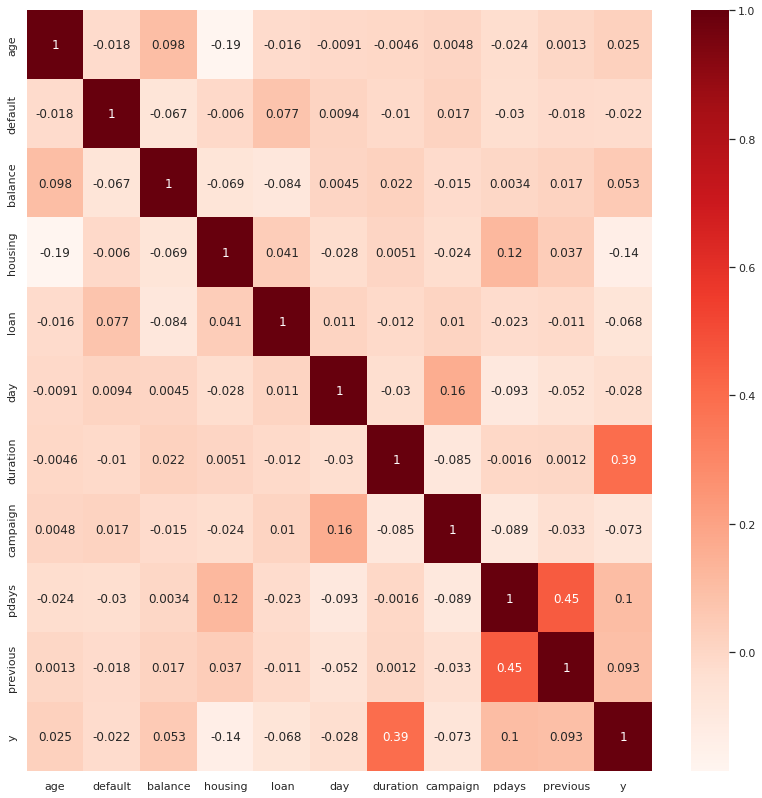

In [ ]:
sns.set(rc={'figure.figsize':(14, 14)})
sns.heatmap(data.corr(), annot=True, cmap = 'Reds')
sns.set(rc={'figure.figsize':(8, 8)})

**It is correlation between duration and y (as noted earlier).\
It is correlation between pdays and previous (due to the predominant number of new customers).**

## **3. Feature engineering**

**We start with numeric features.**

**`age` feature:**
- log transformation

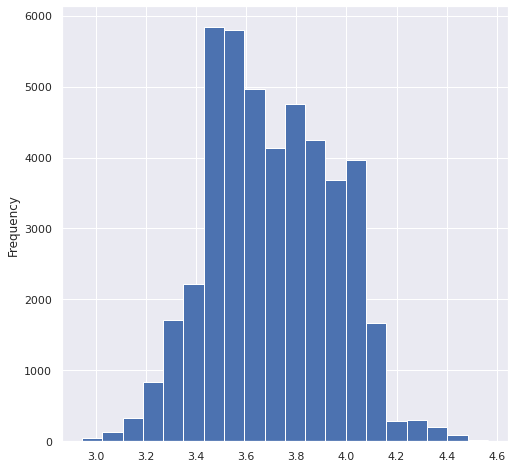

In [ ]:
data['age_log'] = np.log1p(data.age)
data['age_log'].plot(kind='hist', bins=20);

**`balance` feature:**
- yeo-johnson power transformation

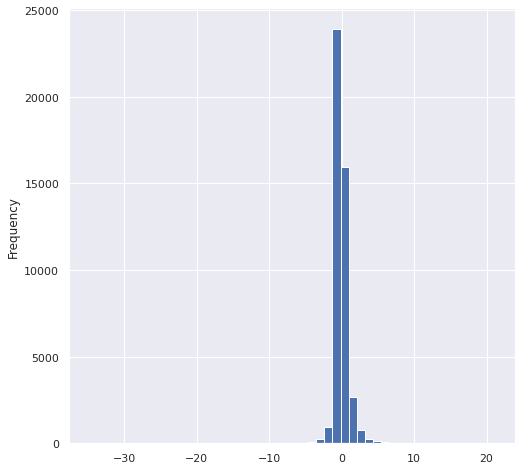

In [ ]:
pt = PowerTransformer(method='yeo-johnson', standardize=True)
data['balance_yeo_johnson'] = pt.fit_transform((data[['balance']]+0.005).to_numpy())
data['balance_yeo_johnson'].plot(kind='hist', bins=50);

**`duration` feature:**
- log transformation

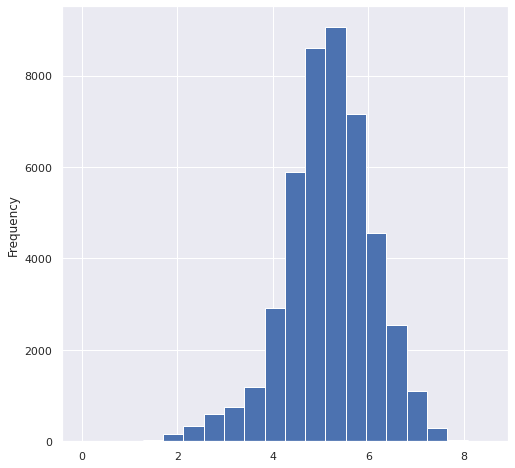

In [ ]:
data['duration_log'] = np.log1p(data.duration)
data['duration_log'].plot(kind='hist', bins=20);

**`campaign` feature:**
- binning

In [ ]:
data.campaign.value_counts(normalize=True)

1     0.388047
2     0.276592
3     0.122116
4     0.077901
5     0.039017
6     0.028555
7     0.016257
8     0.011944
9     0.007233
10    0.005884
11    0.004446
12    0.003428
13    0.002942
14    0.002057
15    0.001858
16    0.001747
17    0.001526
18    0.001128
19    0.000973
20    0.000951
21    0.000774
22    0.000509
23    0.000487
25    0.000487
24    0.000442
28    0.000354
29    0.000354
26    0.000288
31    0.000265
27    0.000221
32    0.000199
30    0.000177
33    0.000133
34    0.000111
36    0.000088
35    0.000088
43    0.000066
38    0.000066
41    0.000044
50    0.000044
37    0.000044
51    0.000022
55    0.000022
46    0.000022
58    0.000022
44    0.000022
39    0.000022
63    0.000022
Name: campaign, dtype: float64

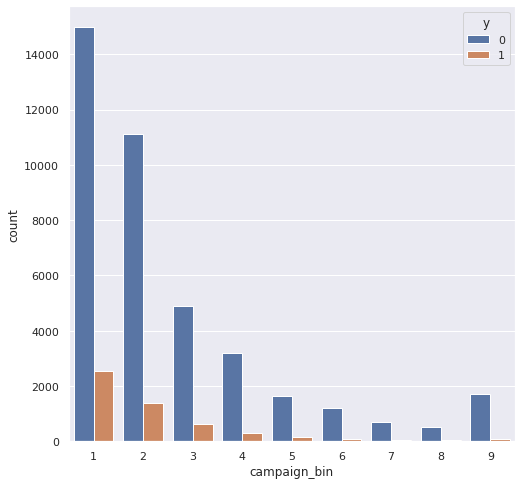

In [ ]:
data['campaign_bin'] = pd.cut(data.campaign,
                              [0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 64],
                              labels=[1, 2, 3, 4, 5, 6, 7, 8, 9]).astype('int64')
sns.countplot(data=data, x='campaign_bin', hue='y');

**`pdays` feature:**
- `new_client` feature creation

In [ ]:
data['pdays'].value_counts(normalize=True)

-1      0.817367
 182    0.003694
 92     0.003251
 183    0.002787
 91     0.002787
          ...   
 749    0.000022
 717    0.000022
 589    0.000022
 493    0.000022
 32     0.000022
Name: pdays, Length: 559, dtype: float64

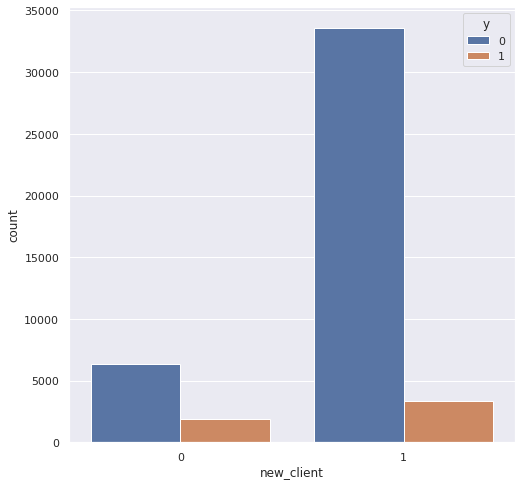

In [ ]:
data['new_client'] = np.where(data.pdays==-1, 1, 0)
sns.countplot(data=data, x='new_client', hue='y');

In [ ]:
data.replace({"pdays": {-1: 0}}, inplace=True)

**`previous` feature:**
- binning

In [ ]:
data['previous'].value_counts(normalize=True)

0      0.817367
1      0.061313
2      0.046582
3      0.025259
4      0.015793
5      0.010152
6      0.006127
7      0.004534
8      0.002853
9      0.002035
10     0.001482
11     0.001438
12     0.000973
13     0.000841
15     0.000442
14     0.000420
17     0.000332
16     0.000288
19     0.000243
23     0.000177
20     0.000177
22     0.000133
18     0.000133
24     0.000111
27     0.000111
29     0.000088
25     0.000088
21     0.000088
30     0.000066
28     0.000044
26     0.000044
37     0.000044
38     0.000044
55     0.000022
40     0.000022
35     0.000022
58     0.000022
51     0.000022
41     0.000022
32     0.000022
275    0.000022
Name: previous, dtype: float64

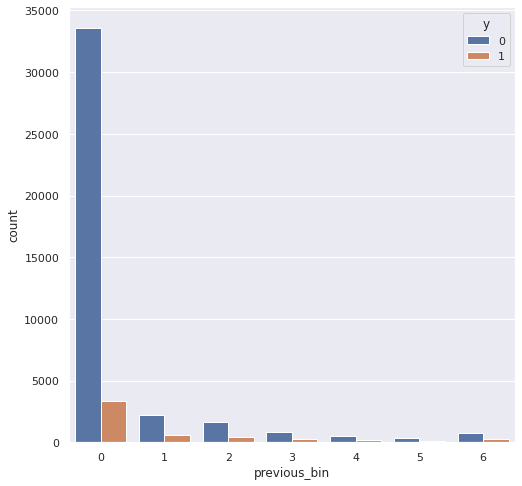

In [ ]:
data['previous_bin'] = pd.cut(data.previous,
                              [-0.5, 0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 285],
                              labels=[0, 1, 2, 3, 4, 5, 6]).astype('int64')
sns.countplot(data=data, x='previous_bin', hue='y');  

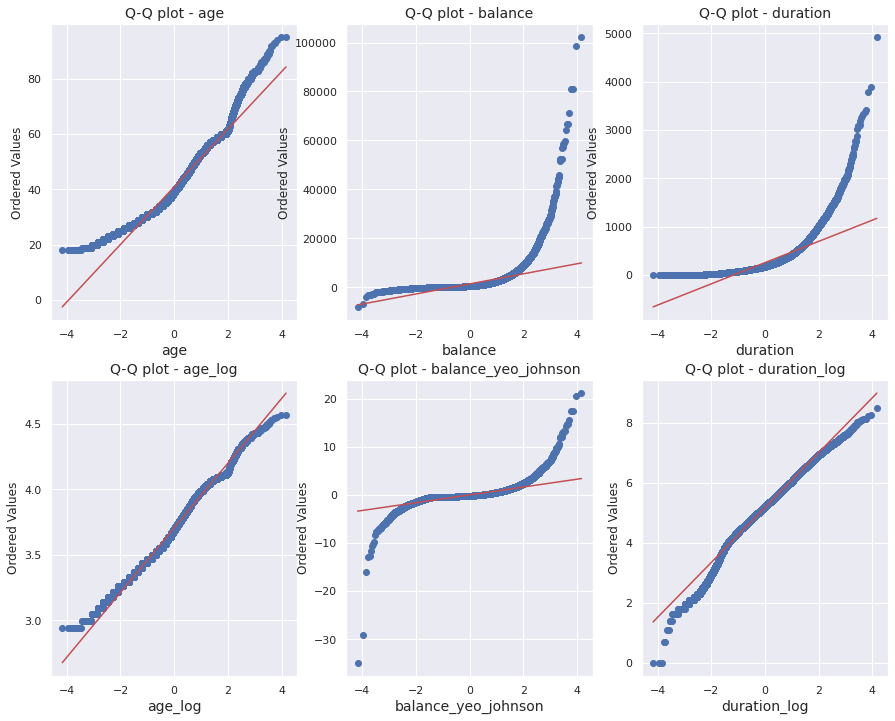

In [ ]:
col_names = ['age', 'age_log', 'balance', 'balance_yeo_johnson', 'duration', 'duration_log']
fig, ax = plt.subplots(2, len(col_names)//2, figsize=(15, 12))
for i, col_val in enumerate(col_names):
    stats.probplot(data[col_val], dist=stats.norm, plot=ax[i%2, i//2])
    ax[i%2, i//2].set_title('Q-Q plot - {}'.format(col_val), fontsize=14)
    ax[i%2, i//2].set_xlabel(col_val, fontsize=14)
plt.show();

**I define `campaign_ratio` parameter:\
as a fraction of number of contacts performed during this campaign and for this client to number of all contacts performed for this client.**

In [ ]:
data["campaigh_ratio"] = data["campaign"] / (data["campaign"] + data["previous"])

**Lets encode categorical features with One-Hot Encoding.**

In [ ]:
cat_cols = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
onehot = OneHotEncoder(drop=['unknown', 'divorced', 'unknown', 'unknown', 12, 'unknown'], sparse=False)
dummies = pd.DataFrame(data=onehot.fit_transform(data[cat_cols]))
dummies.rename(columns=dict(zip(dummies.columns, onehot.get_feature_names(cat_cols))), inplace=True)
dummies.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_married,marital_single,education_primary,education_secondary,education_tertiary,contact_cellular,contact_telephone,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,poutcome_failure,poutcome_other,poutcome_success
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
data_preprocessed = pd.concat((data.drop(columns=['age', 'balance', 'duration', 'campaign', 'previous',
                                                  'job', 'marital', 'education', 'contact', 'month', 'poutcome']),
                            dummies),
                           axis=1)
print(data_preprocessed.shape)
data_preprocessed.head()

(45211, 45)


,default,housing,loan,day,pdays,y,age_log,balance_yeo_johnson,duration_log,campaign_bin,new_client,previous_bin,campaigh_ratio,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_married,marital_single,education_primary,education_secondary,education_tertiary,contact_cellular,contact_telephone,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,poutcome_failure,poutcome_other,poutcome_success
0,0,1,0,5,0,0,4.077537,0.414770,5.568345,1,1,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,1,0,5,0,0,3.806662,-0.410785,5.023881,1,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,1,1,5,0,0,3.526361,-0.431131,4.343805,1,1,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,1,0,5,0,0,3.871201,0.197678,4.532599,1,1,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,5,0,0,3.526361,-0.432128,5.293305,1,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## **4. Model evaluation**

In [ ]:
X = data_preprocessed.drop(columns=['y'])
y = data_preprocessed['y']

scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=data_preprocessed.drop(columns=['y']).columns.tolist())
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.15, random_state=0)

In [ ]:
classifier_names = ['Logistic Regression',
                    'KNN CLassifier',
                    'Decision Tree',
                    'Random Forest',
                    'Gradient Boosting Classifier']

classifiers = [LogisticRegression(solver='liblinear'),
               KNeighborsClassifier(),
               DecisionTreeClassifier(class_weight='balanced'),
               RandomForestClassifier(class_weight='balanced'),
               GradientBoostingClassifier()]

params = [{'penalty': ['l1', 'l2'], 'C': [0.1, 1, 10]},
          {'n_neighbors': [3, 5, 7, 9, 11]},
          {'max_depth': np.arange(5, 13, 2)},
          {'max_depth': np.arange(3, 11, 2), 'n_estimators': np.arange(50, 110, 10)},
          {'learning_rate': [0.05, 0.1, 0.2], 'n_estimators': [50, 100, 200]}]

In [ ]:
train_scores = {'accuracy': [],
                'f1': [],
                'roc_auc': []}
test_scores = {'accuracy': [],
               'f1': [],
               'roc_auc': []}
fitted_classifiers = []

for name, classifier, param in zip(classifier_names, classifiers, params):
    start = time()
    clf = GridSearchCV(estimator=classifier, param_grid=param, scoring='roc_auc')
    clf.fit(X_train, y_train)
    fitted_classifiers.append(clf.best_estimator_)
    train_scores['accuracy'].append(accuracy_score(y_train, clf.best_estimator_.predict(X_train)))
    test_scores['accuracy'].append(accuracy_score(y_test, clf.best_estimator_.predict(X_test)))
    train_scores['f1'].append(f1_score(y_train, clf.best_estimator_.predict(X_train)))
    test_scores['f1'].append(f1_score(y_test, clf.best_estimator_.predict(X_test)))
    train_scores['roc_auc'].append(roc_auc_score(y_train, clf.best_estimator_.predict(X_train)))
    test_scores['roc_auc'].append(roc_auc_score(y_test, clf.best_estimator_.predict(X_test)))
    t = time()-start
    print(f"{name}: {int(t//60)} min {int(t-60*(t//60)//1)} sec")

Logistic Regression: 2 min 32 sec
KNN CLassifier: 10 min 23 sec
Decision Tree: 0 min 3 sec
Random Forest: 2 min 23 sec
Gradient Boosting Classifier: 5 min 24 sec


In [ ]:
scores = pd.DataFrame({'train_accuracy': train_scores['accuracy'],
                       'test_accuracy': test_scores['accuracy'],
                       'train_f1': train_scores['f1'],
                       'test_f1': test_scores['f1'],
                       'train_roc_auc': train_scores['roc_auc'],
                       'test_roc_auc': test_scores['roc_auc']}, index=classifier_names)
pd.set_option('precision', 3)
scores

,train_accuracy,test_accuracy,train_f1,test_f1,train_roc_auc,test_roc_auc
Logistic Regression,0.904,0.898,0.472,0.424,0.670,0.648
KNN CLassifier,0.901,0.892,0.383,0.303,0.624,0.592
Decision Tree,0.823,0.809,0.527,0.502,0.831,0.814
Random Forest,0.859,0.841,0.596,0.553,0.872,0.840
Gradient Boosting Classifier,0.924,0.906,0.622,0.531,0.755,0.710


**Random Forest Classifier is the best classifier based on F1 and ROC-AUC metrics.\
Gradient Boosting Classifier is the best classifier based on accuracy metric.**

**As final model I choose Random Forest Classifier.**

In [ ]:
model = fitted_classifiers[3]
model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=9, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=80,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
pred = model.predict(X_test)
print(f"Accuracy:  {accuracy_score(y_true=y_test, y_pred=pred):.2f}")
print(f"Recall:    {recall_score(y_true=y_test, y_pred=pred):.2f}")
print(f"Precision: {precision_score(y_true=y_test, y_pred=pred):.2f}")
print(f"ROC-AUC:   {roc_auc_score(y_true=y_test, y_score=pred):.2f}")

Accuracy:  0.84
Recall:    0.84
Precision: 0.41
ROC-AUC:   0.84


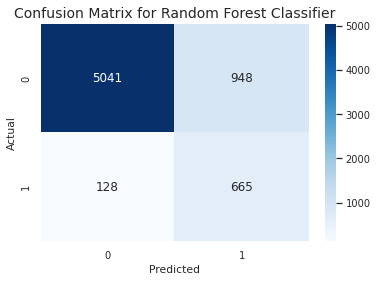

In [ ]:
confmat = confusion_matrix(y_true=y_test, y_pred=pred)
classes = ['0', '1']
df_cm = pd.DataFrame(confmat, columns=classes, index=classes)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize=(6, 4))

ax = plt.axes()
sns.heatmap(df_cm,
            cmap="Blues",
            annot=True,
            annot_kws={"size": 12},
            fmt="d")
sns.set(font_scale=0.9)
ax.set_title('Confusion Matrix for Random Forest Classifier', fontsize=14)
plt.show()

**Two the most informative metrics for us are recall and precision:**
- if we need to predict the success of a marketing campaign and the number of deposit subsribers - precision metric is more important
- if the task is to identify as many actual deposit subscribers as possible - recall metric is more important.\
I think that in this task it is necessary to identify just actual subscribers, so recall is more important to us.

**So final model can predict 84% of actual deposit subscribers.**

**Lets check feature importances.**

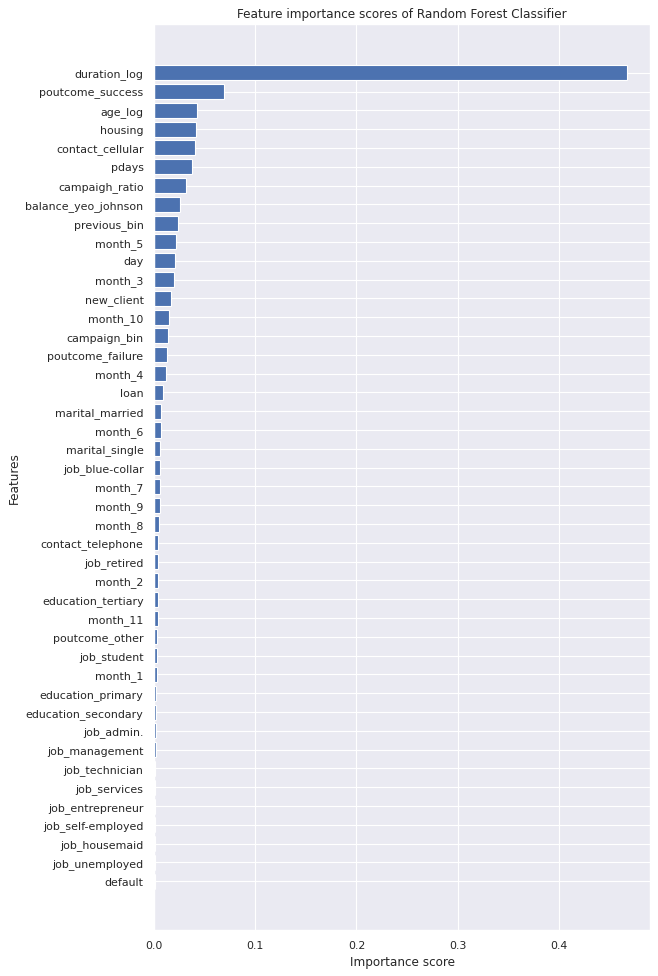

In [ ]:
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = X.columns.tolist(),
                                   columns=['importance']).sort_values('importance',
                                                                       ascending=False)

ylocs = np.arange(X.shape[1])
values_to_plot = feature_importances.values.ravel()[::-1]
feature_labels = list(feature_importances.index)[::-1]

plt.figure(num=None, figsize=(8, 15), dpi=80, facecolor='w', edgecolor='k');
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features')
plt.xlabel('Importance score')
plt.title('Feature importance scores of Random Forest Classifier')
plt.yticks(ylocs, feature_labels)
plt.show()

**I check feature importances of logistic regression (as the most interpretable model) too, to compare results with the main model.**

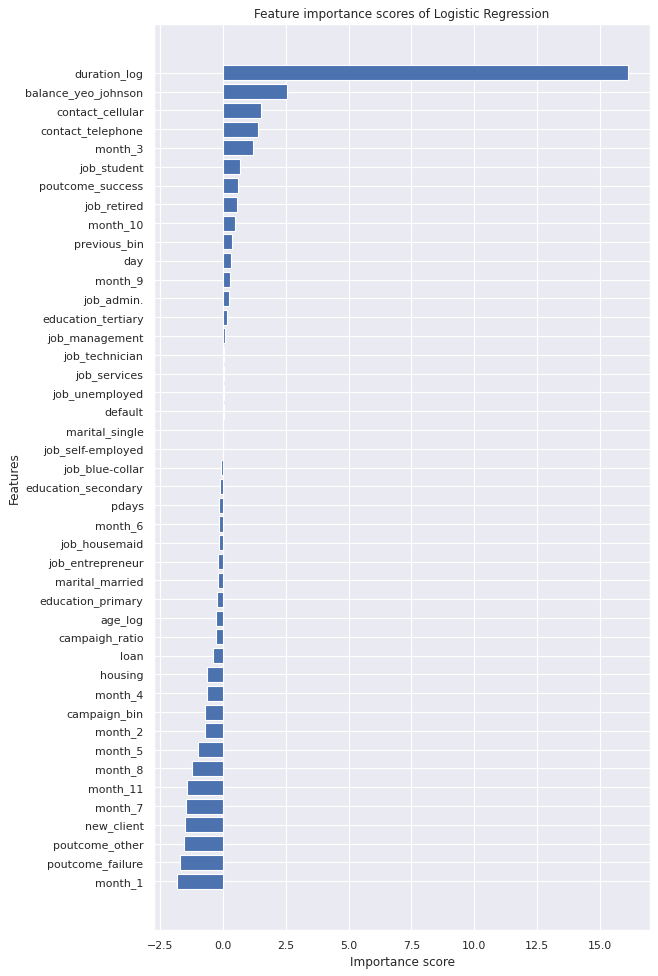

In [ ]:
feature_importances = pd.DataFrame(fitted_classifiers[0].coef_[0],
                                   index = X.columns.tolist(),
                                   columns=['importance']).sort_values('importance',
                                                                       ascending=False)

ylocs = np.arange(X.shape[1])
values_to_plot = feature_importances.values.ravel()[::-1]
feature_labels = list(feature_importances.index)[::-1]

plt.figure(num=None, figsize=(8, 15), dpi=80, facecolor='w', edgecolor='k');
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features')
plt.xlabel('Importance score')
plt.title('Feature importance scores of Logistic Regression')
plt.yticks(ylocs, feature_labels)
plt.show()

**Recommendations to the marketing manager:**

1. **Last contact duration** - it is necessary to make an effort to interest the customer as much as possible from the first seconds, because a long call significantly increases the chances of success.

2. **The period of the marketing campaign** - in March, September and October - the effectiveness of the campaign is higher.

3. **Loyal customers** - customers who have been successfully involved in previous campaigns trust the bank more and are ready to cooperate again.

4. **Age/job** - young people (students) and retirees are more likely than others to think about the future and are ready to save money on deposit accounts.